In [252]:
import pandas as pd
import seaborn as sns
import matplotlib as mtl
import matplotlib.pyplot as plt
import numpy as np
import os
sns.set_style('darkgrid')

%matplotlib inline

# Getting the data

In [253]:
pwd = os.getcwd()
path = os.path.join(pwd, 'heart.csv')
df = pd.read_csv(path)

In [254]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

Data contains;

- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [256]:
df.shape

(303, 14)

In [257]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [258]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [259]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

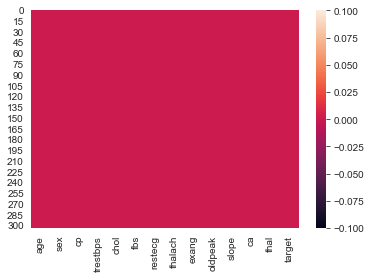

In [260]:
sns.heatmap(df.isnull())

In [261]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

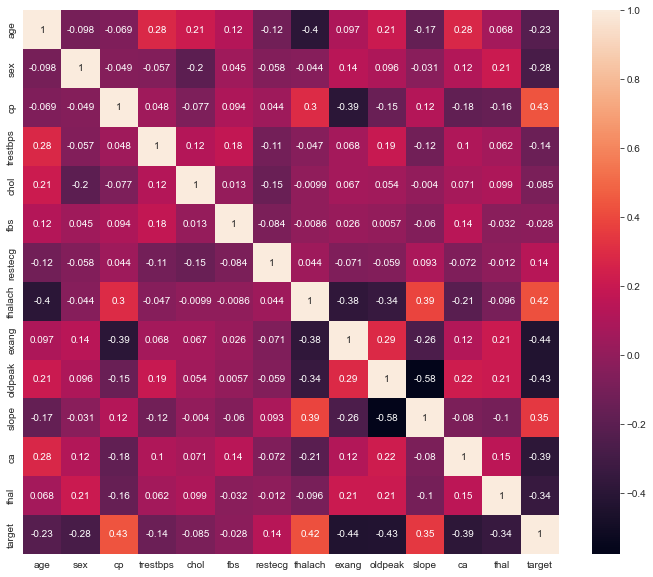

In [262]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [263]:
corr_val = df.corr()['target'].sort_values(ascending=False) 
corr_val

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

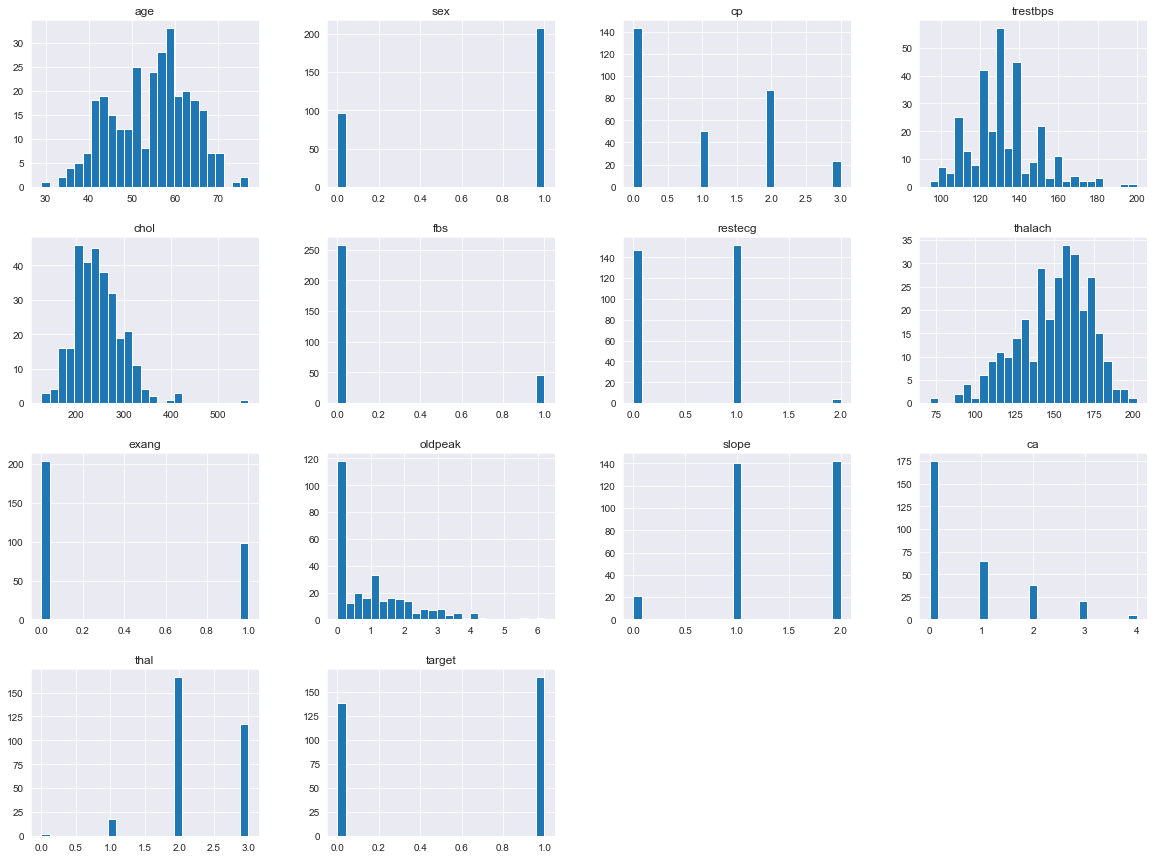

In [264]:
df.hist(bins=25, figsize=(20,15))
plt.show()

In [265]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## Seperating categorical data from numerical data

In [266]:
cat = []
num = []
for i in df.nunique().index:
    if df.nunique()[i] < 10:
        cat.append(i)
    else:
        num.append(i)

In [267]:
df_cat = df[cat].copy()
df_cat

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


In [268]:
df_num = df[num].copy()
df_num

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


# Exploring Categorical Data

In [269]:
for i in df_cat:
    print(df_cat[i].value_counts())

1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
0    258
1     45
Name: fbs, dtype: int64
1    152
0    147
2      4
Name: restecg, dtype: int64
0    204
1     99
Name: exang, dtype: int64
2    142
1    140
0     21
Name: slope, dtype: int64
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
2    166
3    117
1     18
0      2
Name: thal, dtype: int64
1    165
0    138
Name: target, dtype: int64


array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'slope'}>],
       [<AxesSubplot:title={'center':'ca'}>,
        <AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

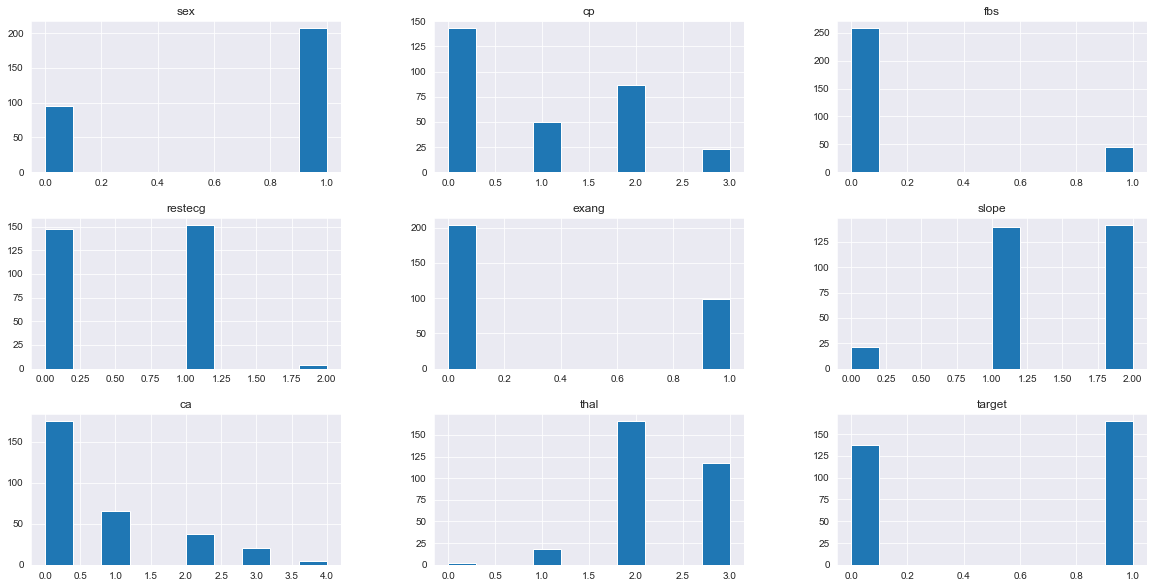

In [270]:
df_cat.hist(figsize=(20, 10))

<AxesSubplot:>

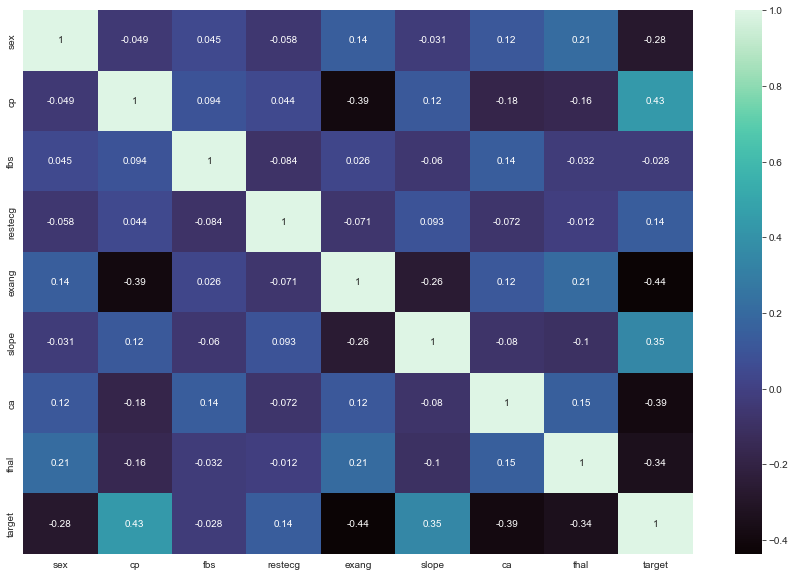

In [271]:
plt.figure(figsize=[15, 10])
sns.heatmap(df_cat.corr(), annot=True, cmap='mako')

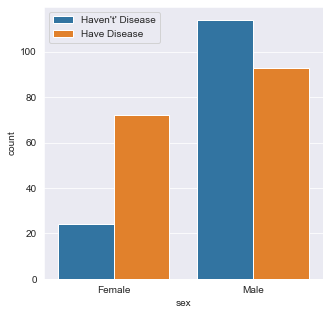

In [272]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_cat,x='sex',hue='target')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
plt.legend(["Haven't' Disease", 'Have Disease'])

([<matplotlib.axis.XTick at 0x1754c3633a0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

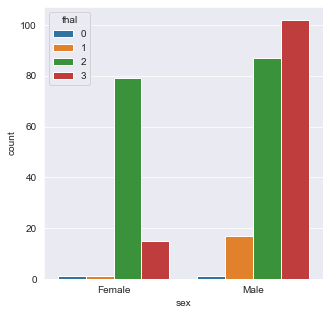

In [273]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_cat,x='sex',hue='thal')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
# plt.legend(["Haven't' Disease", 'Have Disease'])

# Exploring Numerical Data

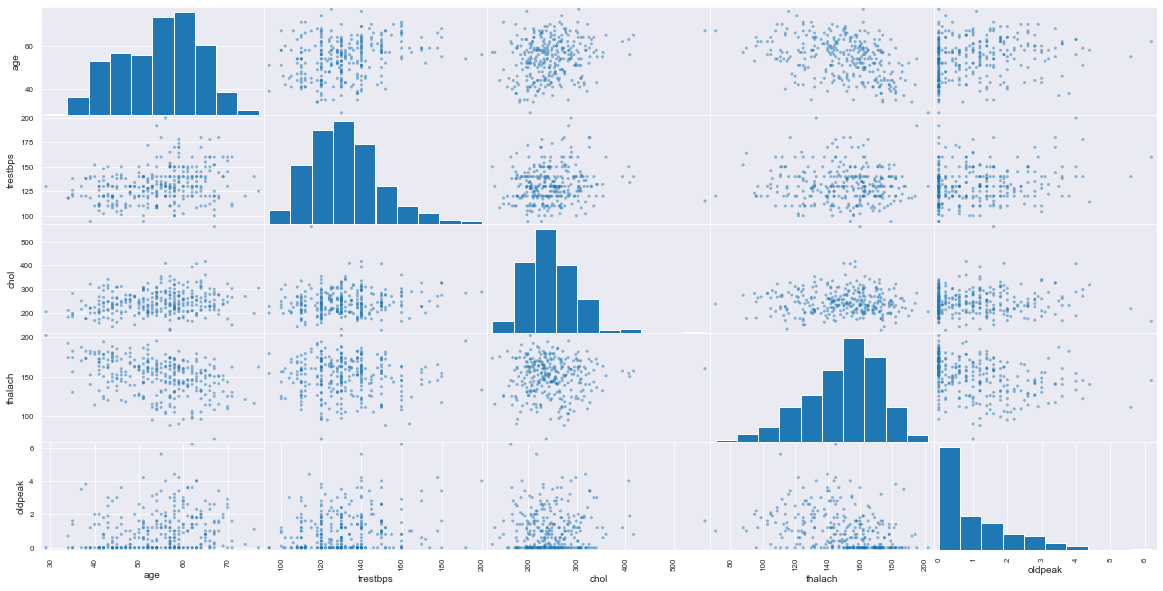

In [274]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_num, figsize=(20, 10))
plt.show()

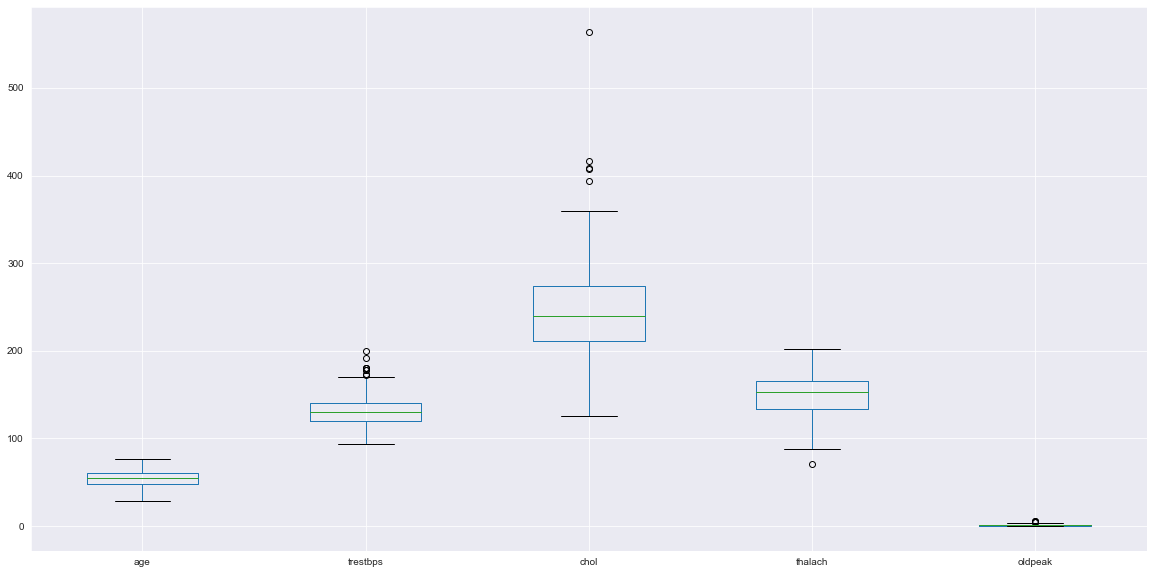

In [275]:
from pandas.plotting import boxplot
boxplot(df_num, figsize=(20, 10))
plt.show()

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python39\lib\site-packages\seaborn\_dec

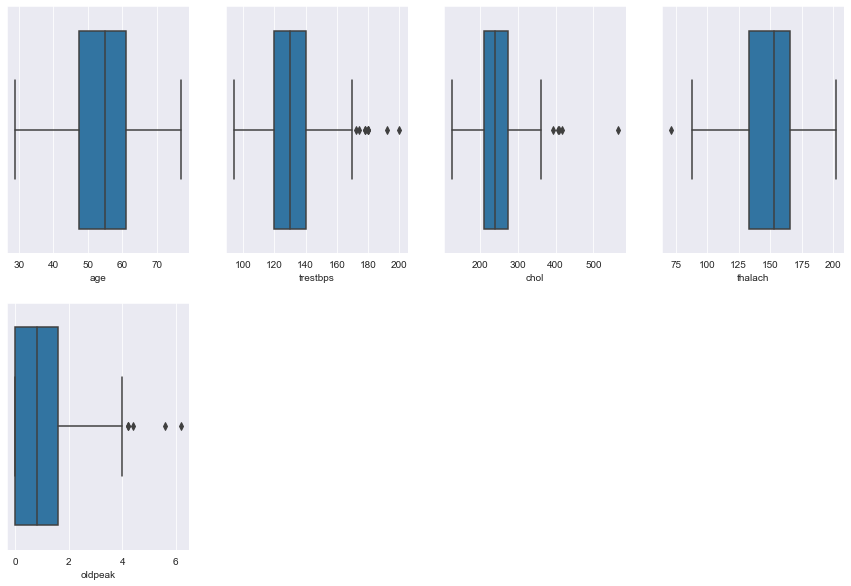

In [276]:
plt.figure(figsize=[15, 10])
for i in range(len(df_num.columns)):
    plt.subplot(2, 4 ,i + 1)
    sns.boxplot(df_num[df_num.columns[i]])
plt.show()

In [277]:
df_num.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


<AxesSubplot:>

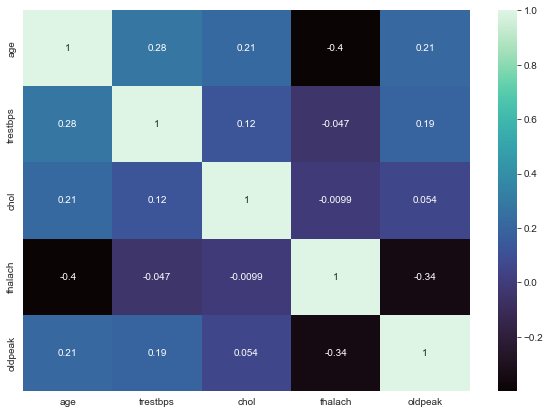

In [278]:
plt.figure(figsize=(10,7))
sns.heatmap(df_num.corr(), annot=True, cmap='mako')

## Reconciling the numerical and categorical data

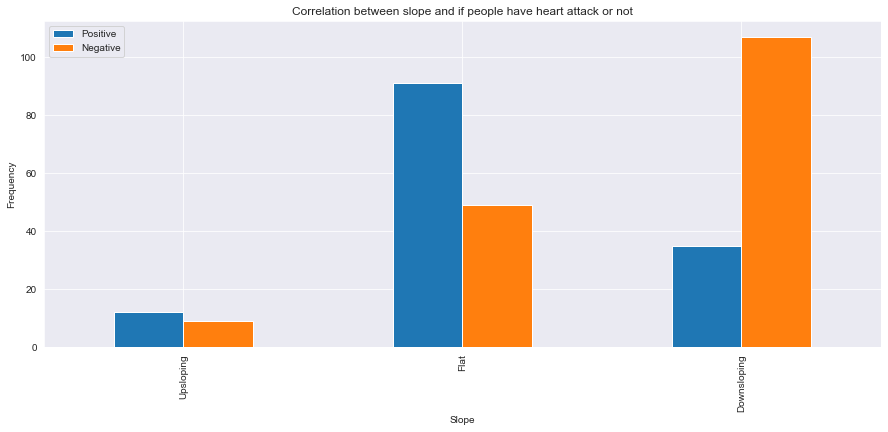

In [279]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Correlation between slope and if people have heart attack or not')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.xticks(ticks = [0,1,2], labels = ['Upsloping','Flat', 'Downsloping'])
plt.legend(["Positive", 'Negative'])
plt.show()

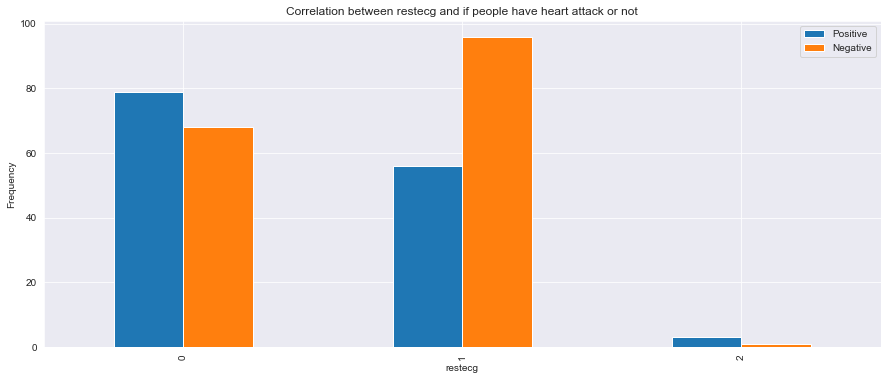

In [280]:
pd.crosstab(df['restecg'],df.target).plot(kind="bar",figsize=(15,6))
plt.title('Correlation between restecg and if people have heart attack or not')
plt.xlabel('restecg')
plt.ylabel('Frequency')
# plt.xticks(ticks = [0,1,2], labels = ['Upsloping','Flat', 'Downsloping'])
plt.legend(["Positive", 'Negative'])
plt.show()

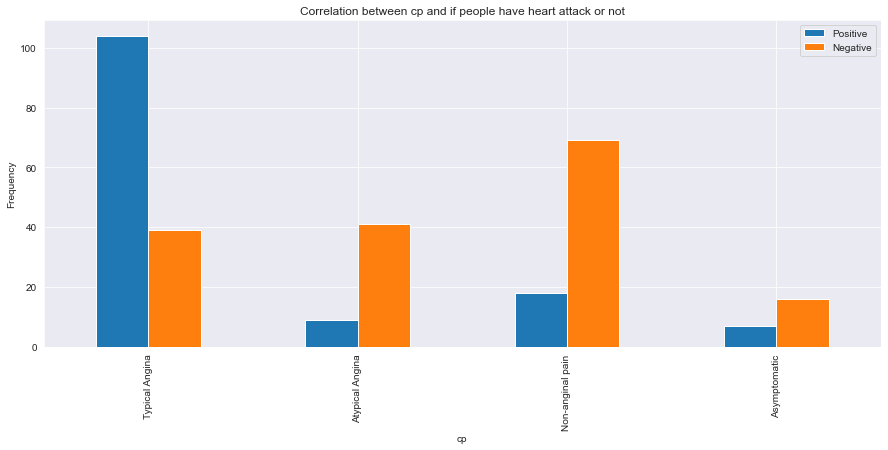

In [281]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Correlation between cp and if people have heart attack or not')
plt.xlabel('cp')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2, 3],labels=["Typical Angina", 'Atypical Angina', 'Non-anginal pain', 'Asymptomatic'])
plt.legend(["Positive", 'Negative'])
plt.show()

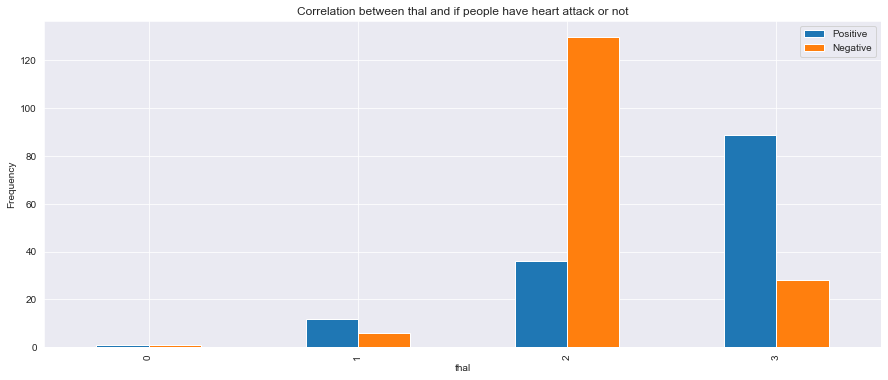

In [282]:
pd.crosstab(df.thal,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Correlation between thal and if people have heart attack or not')
plt.xlabel('thal')
plt.ylabel('Frequency')
# plt.xticks(ticks=[0, 1, 2, 3],labels=["Typical Angina", 'Atypical Angina', 'Non-anginal pain', 'Asymptomatic'])
plt.legend(["Positive", 'Negative'])
plt.show()

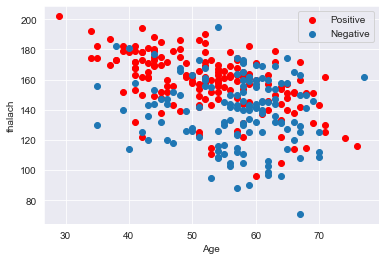

In [283]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Positive", 'Negative'])
plt.xlabel("Age")
plt.ylabel("thalach")
plt.show()


# Preprocessing Data

In [284]:
df_cat.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

In [285]:
# seperating the non binary data from the binary
binary = []
nonbinary = []
for i in df_cat.nunique().index:
    if df.nunique()[i] == 2:
        binary.append(i)
    else:
        nonbinary.append(i)

In [286]:
binary

['sex', 'fbs', 'exang', 'target']

### Description of binary data


sex: sex (1 = male; 0 = female)

fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

exang: exercise induced angina (1 = yes; 0 = no)

In [287]:
nonbinary

['cp', 'restecg', 'slope', 'ca', 'thal']

### Description of non binary data
cp: chest pain type:

        - Value 0: typical angina

        - Value 1: atypical angina

        - Value 2: non-anginal pain
        
        - Value 3: asymptomatic


restecg: resting electrocardiographic results:

        - Value 0: normal

        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)

        - Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria

slope: the slope of the peak exercise ST segment:

        - Value 0: upsloping

        - Value 1: flat

        - Value 2: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [288]:
corr_val

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [289]:
highest_corr_features = ['cp_0', 'cp_1', 'cp_2', 'cp_3', 'thalach', 'sl_0', 'sl_1', 'sl_2', 'restecg']
lowest_corr_features = ['exang', 'oldpeak', 'ca', 'thal']
highlow_corr_featrues = highest_corr_features + lowest_corr_features

In [290]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [291]:
def preprocess_inputs(df, scaler):
    df = df.copy()
    
    # One-hot encode the nominal features
    nominal_features = ['cp', 'slope']
    df = onehot_encode(df, dict(zip(nominal_features, ['cp', 'sl'])))
    
    # Split df into X and y
    y = df['target'].copy()
    X = df.drop('target', axis=1).copy()
    
    # Scale X
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    high_corr = X[highest_corr_features]
    low_corr = X[lowest_corr_features]
    highlow_corr = X[highlow_corr_featrues]
    return X, y, high_corr, low_corr, highlow_corr

In [292]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

X_r, y_robust, Xr_high, Xr_low, Xr_highlow = preprocess_inputs(df, RobustScaler())
X_s, y_stand, Xs_high, Xs_low, Xs_highlow = preprocess_inputs(df, StandardScaler())
X_m, y_mm, Xm_high, Xm_low, Xm_highlow = preprocess_inputs(df, MinMaxScaler())


In [293]:
def y_converter(y):
    y_target = y.copy()
    y_target = y_target.map({0:'Positive', 1:'Negative'})
    return y_target

In [294]:
y_r = y_converter(y_robust)

In [295]:
y_s = y_converter(y_stand)

In [296]:
y_m = y_converter(y_mm)

# Machine Learning Models

In [297]:
from sklearn.model_selection import train_test_split

def split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42)

    return X_train, X_test, y_train, y_test
    
#Robust scaler all data
Xr_train, Xr_test, yr_train, yr_test = split(X_r, y_r)
Xrh_train, Xrh_test, yrh_train, yrh_test = split(Xr_high, y_r)
Xrl_train, Xrl_test, yrl_train, yrl_test = split(Xr_low, y_r)
Xrhl_train, Xrhl_test, yrhl_train, yrhl_test = split(Xr_highlow, y_r)

#Standard Scaler all data
Xs_train, Xs_test, ys_train, ys_test = split(X_s, y_s)
Xsh_train, Xsh_test, ysh_train, ysh_test = split(Xs_high, y_s)
Xsl_train, Xsl_test, ysl_train, ysl_test = split(Xs_low, y_s)
Xshl_train, Xshl_test, yshl_train, yshl_test = split(Xs_highlow, y_s)

#MinMaxScaler all data
Xm_train, Xm_test, ym_train, ym_test = split(X_m, y_m)
Xmh_train, Xmh_test, ymh_train, ymh_test = split(Xm_high, y_m)
Xml_train, Xml_test, yml_train, yml_test = split(Xm_low, y_m)
Xmhl_train, Xmhl_test, ymhl_train, ymhl_test = split(Xr_highlow, y_m)


In [298]:
print("X_train shape: {}".format(Xr_train.shape)) 
print("y_train shape: {}".format(yr_train.shape))
print("X_test shape: {}".format(Xr_test.shape)) 
print("y_test shape: {}".format(yr_test.shape))

X_train shape: (227, 18)
y_train shape: (227,)
X_test shape: (76, 18)
y_test shape: (76,)


In [299]:
print("X_train shape: {}".format(Xs_train.shape)) 
print("y_train shape: {}".format(ys_train.shape))
print("X_test shape: {}".format(Xs_test.shape)) 
print("y_test shape: {}".format(ys_test.shape))

X_train shape: (227, 18)
y_train shape: (227,)
X_test shape: (76, 18)
y_test shape: (76,)


In [300]:
print("X_train shape: {}".format(Xm_train.shape)) 
print("y_train shape: {}".format(ym_train.shape))
print("X_test shape: {}".format(Xm_test.shape)) 
print("y_test shape: {}".format(ym_test.shape))

X_train shape: (227, 18)
y_train shape: (227,)
X_test shape: (76, 18)
y_test shape: (76,)


In [307]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Naive Bayes

In [341]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

def NB_alg(X_train, X_test, y_train, y_test):
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    y_train_pred = cross_val_predict(gnb, X_train, y_train, cv=3)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix) 
    
    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
    print('Sensitivity : ', 100*sensitivity )

    specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
    print('Specificity : ', 100*specificity)

    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = gnb.predict_proba(X_test)[: ,0], pos_label='Negative')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Negative Rate")
    plt.ylabel("True Negative Rate (Recall)")
    plt.show()
    print('AUC: ',auc(fpr,tpr))
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = gnb.predict_proba(X_test)[: ,1], pos_label='Positive')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.show()
    print('AUC: ', auc(fpr,tpr))

    precision = 100*precision_score(y_train, y_train_pred, pos_label='Positive')
    recall = 100*recall_score(y_train, y_train_pred, pos_label='Positive')
    accuracy = 100*accuracy_score(y_train, y_train_pred)
    f1 = 100*f1_score(y_train, y_train_pred, pos_label='Positive')

    print('Precision Score: ', 100*precision_score(y_train, y_train_pred, pos_label='Positive')) 
    print('Recall Score: ', 100*recall_score(y_train, y_train_pred, pos_label='Positive')) 
    print('Accuracy Score: ', 100*accuracy_score(y_train, y_train_pred)) 
    print('F1 Score: ', 100*f1_score(y_train, y_train_pred, pos_label='Positive'))
    print(classification_report(y_train, y_train_pred))

    return precision, recall, accuracy, f1, conf_matrix

### Robust Scaler

[[33  8]
 [ 4 31]]
Sensitivity :  89.1891891891892
Specificity :  79.48717948717949


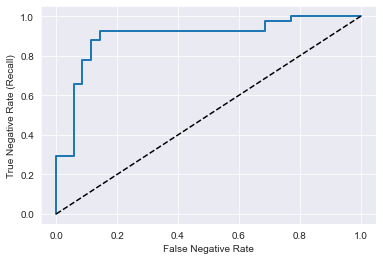

AUC:  0.8982578397212544


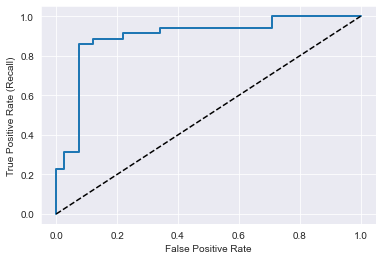

AUC:  0.8982578397212544
Precision Score:  70.09345794392523
Recall Score:  72.81553398058253
Accuracy Score:  73.568281938326
F1 Score:  71.42857142857142
              precision    recall  f1-score   support

    Negative       0.77      0.74      0.75       124
    Positive       0.70      0.73      0.71       103

    accuracy                           0.74       227
   macro avg       0.73      0.74      0.73       227
weighted avg       0.74      0.74      0.74       227



(70.09345794392523,
 72.81553398058253,
 73.568281938326,
 71.42857142857142,
 array([[33,  8],
        [ 4, 31]], dtype=int64))

In [342]:
x = NB_alg(Xr_train, Xr_test, yr_train, yr_test)
x

[[33  8]
 [ 8 27]]
Sensitivity :  80.48780487804879
Specificity :  77.14285714285715


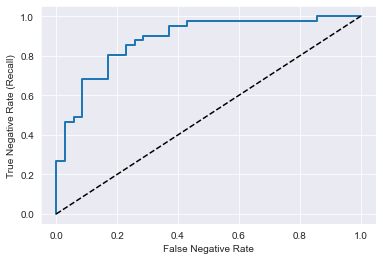

AUC:  0.8815331010452961


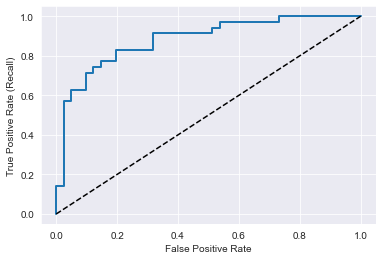

AUC:  0.8815331010452961
Precision Score:  70.29702970297029
Recall Score:  68.93203883495146
Accuracy Score:  72.68722466960352
F1 Score:  69.6078431372549
              precision    recall  f1-score   support

    Negative       0.75      0.76      0.75       124
    Positive       0.70      0.69      0.70       103

    accuracy                           0.73       227
   macro avg       0.72      0.72      0.72       227
weighted avg       0.73      0.73      0.73       227



(70.29702970297029,
 68.93203883495146,
 72.68722466960352,
 69.6078431372549,
 array([[33,  8],
        [ 8, 27]], dtype=int64))

In [343]:
NB_alg(Xrh_train, Xrh_test, yrh_train, yrh_test)

[[30 11]
 [ 5 30]]
Sensitivity :  85.71428571428571
Specificity :  73.17073170731707


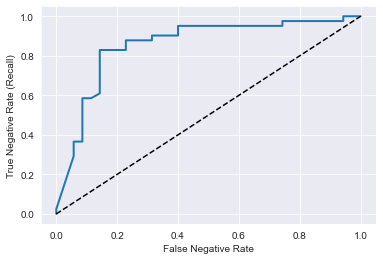

AUC:  0.8554006968641115


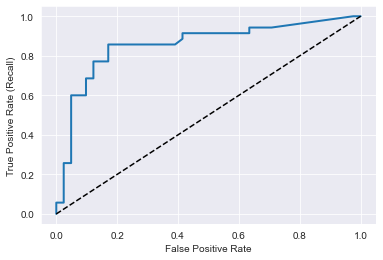

AUC:  0.8554006968641115
Precision Score:  72.27722772277228
Recall Score:  70.87378640776699
Accuracy Score:  74.44933920704845
F1 Score:  71.56862745098039
              precision    recall  f1-score   support

    Negative       0.76      0.77      0.77       124
    Positive       0.72      0.71      0.72       103

    accuracy                           0.74       227
   macro avg       0.74      0.74      0.74       227
weighted avg       0.74      0.74      0.74       227



(72.27722772277228,
 70.87378640776699,
 74.44933920704845,
 71.56862745098039,
 array([[30, 11],
        [ 5, 30]], dtype=int64))

In [344]:
NB_alg(Xrl_train, Xrl_test, yrl_train, yrl_test)

[[35  6]
 [ 4 31]]
Sensitivity :  89.74358974358975
Specificity :  83.78378378378379


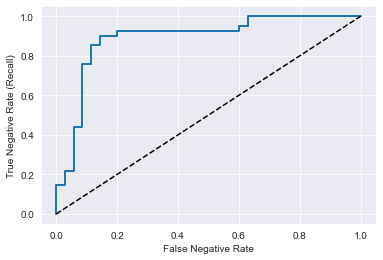

AUC:  0.8898954703832753


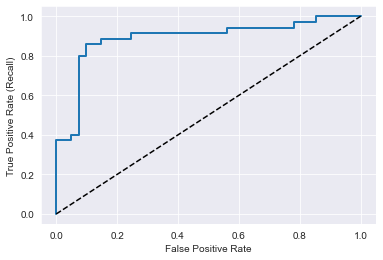

AUC:  0.8898954703832752
Precision Score:  72.11538461538461
Recall Score:  72.81553398058253
Accuracy Score:  74.8898678414097
F1 Score:  72.46376811594203
              precision    recall  f1-score   support

    Negative       0.77      0.77      0.77       124
    Positive       0.72      0.73      0.72       103

    accuracy                           0.75       227
   macro avg       0.75      0.75      0.75       227
weighted avg       0.75      0.75      0.75       227



(72.11538461538461,
 72.81553398058253,
 74.8898678414097,
 72.46376811594203,
 array([[35,  6],
        [ 4, 31]], dtype=int64))

In [345]:
NB_alg(Xrhl_train, Xrhl_test, yrhl_train, yrhl_test)

### Standard Scaler

[[33  8]
 [ 4 31]]
Sensitivity :  89.1891891891892
Specificity :  79.48717948717949


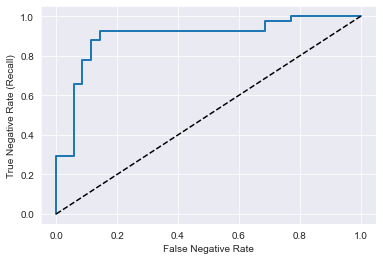

AUC:  0.8982578397212544


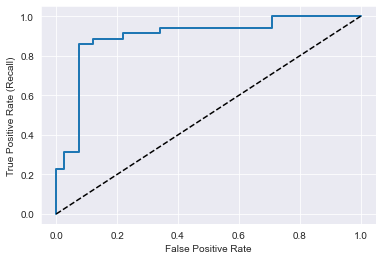

AUC:  0.8982578397212544
Precision Score:  70.09345794392523
Recall Score:  72.81553398058253
Accuracy Score:  73.568281938326
F1 Score:  71.42857142857142
              precision    recall  f1-score   support

    Negative       0.77      0.74      0.75       124
    Positive       0.70      0.73      0.71       103

    accuracy                           0.74       227
   macro avg       0.73      0.74      0.73       227
weighted avg       0.74      0.74      0.74       227



(70.09345794392523,
 72.81553398058253,
 73.568281938326,
 71.42857142857142,
 array([[33,  8],
        [ 4, 31]], dtype=int64))

In [346]:
NB_alg(Xs_train, Xs_test, ys_train, ys_test)

[[33  8]
 [ 8 27]]
Sensitivity :  80.48780487804879
Specificity :  77.14285714285715


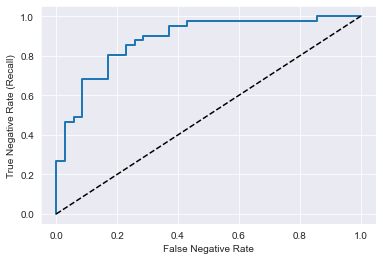

AUC:  0.8815331010452961


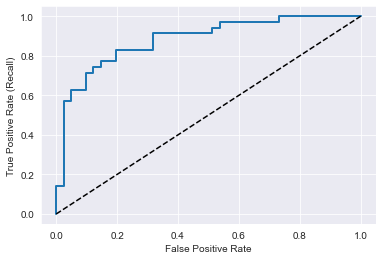

AUC:  0.8815331010452961
Precision Score:  70.29702970297029
Recall Score:  68.93203883495146
Accuracy Score:  72.68722466960352
F1 Score:  69.6078431372549
              precision    recall  f1-score   support

    Negative       0.75      0.76      0.75       124
    Positive       0.70      0.69      0.70       103

    accuracy                           0.73       227
   macro avg       0.72      0.72      0.72       227
weighted avg       0.73      0.73      0.73       227



(70.29702970297029,
 68.93203883495146,
 72.68722466960352,
 69.6078431372549,
 array([[33,  8],
        [ 8, 27]], dtype=int64))

In [347]:
NB_alg(Xsh_train, Xsh_test, ysh_train, ysh_test)

[[30 11]
 [ 5 30]]
Sensitivity :  85.71428571428571
Specificity :  73.17073170731707


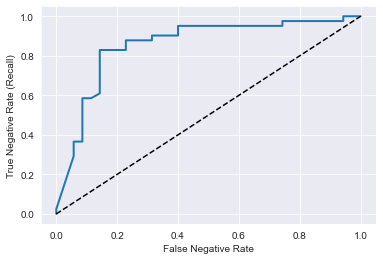

AUC:  0.8554006968641115


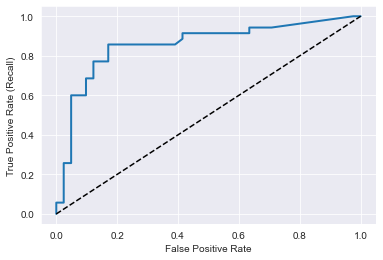

AUC:  0.8554006968641115
Precision Score:  72.27722772277228
Recall Score:  70.87378640776699
Accuracy Score:  74.44933920704845
F1 Score:  71.56862745098039
              precision    recall  f1-score   support

    Negative       0.76      0.77      0.77       124
    Positive       0.72      0.71      0.72       103

    accuracy                           0.74       227
   macro avg       0.74      0.74      0.74       227
weighted avg       0.74      0.74      0.74       227



(72.27722772277228,
 70.87378640776699,
 74.44933920704845,
 71.56862745098039,
 array([[30, 11],
        [ 5, 30]], dtype=int64))

In [348]:
NB_alg(Xsl_train, Xsl_test, ysl_train, ysl_test)

[[35  6]
 [ 4 31]]
Sensitivity :  89.74358974358975
Specificity :  83.78378378378379


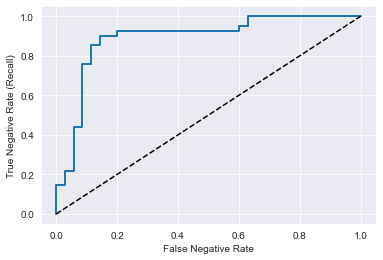

AUC:  0.8898954703832753


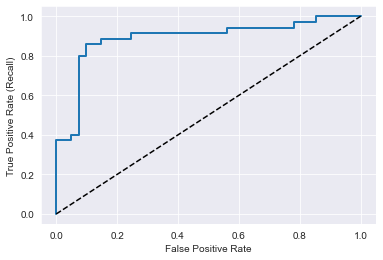

AUC:  0.8898954703832752
Precision Score:  72.11538461538461
Recall Score:  72.81553398058253
Accuracy Score:  74.8898678414097
F1 Score:  72.46376811594203
              precision    recall  f1-score   support

    Negative       0.77      0.77      0.77       124
    Positive       0.72      0.73      0.72       103

    accuracy                           0.75       227
   macro avg       0.75      0.75      0.75       227
weighted avg       0.75      0.75      0.75       227



(72.11538461538461,
 72.81553398058253,
 74.8898678414097,
 72.46376811594203,
 array([[35,  6],
        [ 4, 31]], dtype=int64))

In [349]:
NB_alg(Xshl_train, Xshl_test, yshl_train, yshl_test)

### Minimax Scaler

[[33  8]
 [ 4 31]]
Sensitivity :  89.1891891891892
Specificity :  79.48717948717949


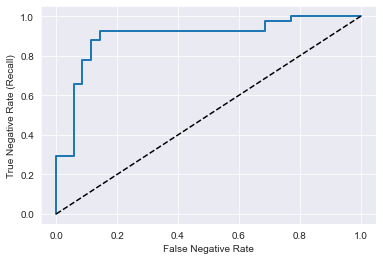

AUC:  0.8982578397212544


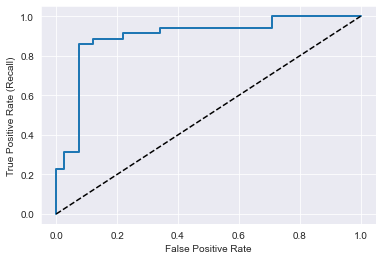

AUC:  0.8982578397212544
Precision Score:  70.09345794392523
Recall Score:  72.81553398058253
Accuracy Score:  73.568281938326
F1 Score:  71.42857142857142
              precision    recall  f1-score   support

    Negative       0.77      0.74      0.75       124
    Positive       0.70      0.73      0.71       103

    accuracy                           0.74       227
   macro avg       0.73      0.74      0.73       227
weighted avg       0.74      0.74      0.74       227



(70.09345794392523,
 72.81553398058253,
 73.568281938326,
 71.42857142857142,
 array([[33,  8],
        [ 4, 31]], dtype=int64))

In [350]:
NB_alg(Xm_train, Xm_test, ym_train, ym_test)

[[33  8]
 [ 8 27]]
Sensitivity :  80.48780487804879
Specificity :  77.14285714285715


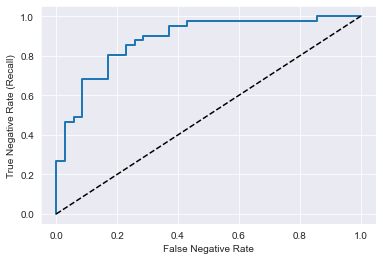

AUC:  0.8815331010452961


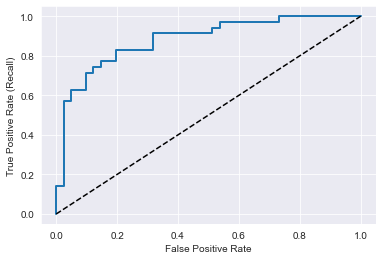

AUC:  0.8815331010452961
Precision Score:  70.29702970297029
Recall Score:  68.93203883495146
Accuracy Score:  72.68722466960352
F1 Score:  69.6078431372549
              precision    recall  f1-score   support

    Negative       0.75      0.76      0.75       124
    Positive       0.70      0.69      0.70       103

    accuracy                           0.73       227
   macro avg       0.72      0.72      0.72       227
weighted avg       0.73      0.73      0.73       227



(70.29702970297029,
 68.93203883495146,
 72.68722466960352,
 69.6078431372549,
 array([[33,  8],
        [ 8, 27]], dtype=int64))

In [351]:
NB_alg(Xmh_train, Xmh_test, ymh_train, ymh_test)

[[30 11]
 [ 5 30]]
Sensitivity :  85.71428571428571
Specificity :  73.17073170731707


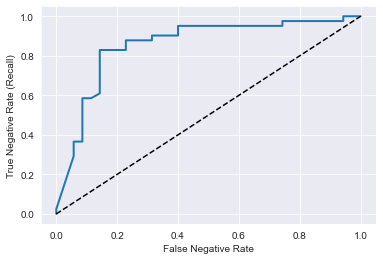

AUC:  0.8554006968641115


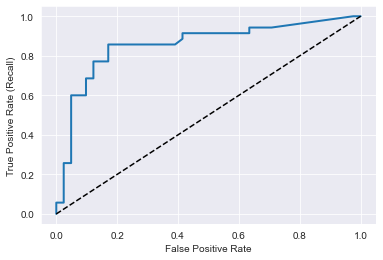

AUC:  0.8554006968641115
Precision Score:  72.27722772277228
Recall Score:  70.87378640776699
Accuracy Score:  74.44933920704845
F1 Score:  71.56862745098039
              precision    recall  f1-score   support

    Negative       0.76      0.77      0.77       124
    Positive       0.72      0.71      0.72       103

    accuracy                           0.74       227
   macro avg       0.74      0.74      0.74       227
weighted avg       0.74      0.74      0.74       227



(72.27722772277228,
 70.87378640776699,
 74.44933920704845,
 71.56862745098039,
 array([[30, 11],
        [ 5, 30]], dtype=int64))

In [352]:
NB_alg(Xml_train, Xml_test, yml_train, yml_test)

[[35  6]
 [ 4 31]]
Sensitivity :  89.74358974358975
Specificity :  83.78378378378379


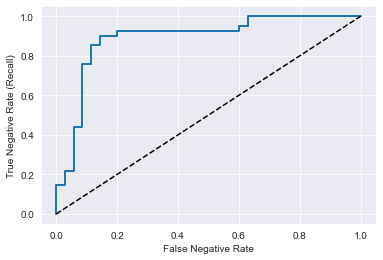

AUC:  0.8898954703832753


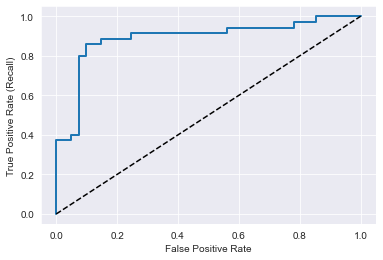

AUC:  0.8898954703832752
Precision Score:  72.11538461538461
Recall Score:  72.81553398058253
Accuracy Score:  74.8898678414097
F1 Score:  72.46376811594203
              precision    recall  f1-score   support

    Negative       0.77      0.77      0.77       124
    Positive       0.72      0.73      0.72       103

    accuracy                           0.75       227
   macro avg       0.75      0.75      0.75       227
weighted avg       0.75      0.75      0.75       227



(72.11538461538461,
 72.81553398058253,
 74.8898678414097,
 72.46376811594203,
 array([[35,  6],
        [ 4, 31]], dtype=int64))

In [353]:
NB_alg(Xmhl_train, Xmhl_test, ymhl_train, ymhl_test)